# This code made M Dhifta for sentiment analysis psbb data
# model and data set made M Dhifta
# SENTIMENT ANALYSIS PSBB IN INDONESIAN WITH NAIVE BAYES BY M DHIFTA

In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
import string
import re
import gensim
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [527]:
pd.set_option("display.max.colwidth", 200)
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib inline

# Data Training dan Testing

In [528]:
train = pd.read_csv(r'E:\software_analysis\nltk_analysis\DATA_LEARN\train.csv', encoding = "ISO-8859-1", engine='python')
test = pd.read_csv(r'E:\software_analysis\nltk_analysis\DATA_LEARN\test.csv', encoding = "ISO-8859-1", engine='python')

In [529]:
#tampilkan data training negatif
print(train[train['label']==0].head(5))
#tampilkan data training positif
# print("")
print(train[train['label']==1].head(5))

      id  label                                                       tweet
102  103      0  saya yakin yang berwenang tahu dampak dari pengesahan ini 
103  104      0    percuma pak nerapin psbb kalo antekmu yang bikin masalah
104  105      0                                     pusing psbb berantakan 
105  106      0   sumpa serem bgt takut  pls psbb selesai kek sepi bgt ini 
106  107      0                mending kgak usah psbb dari kemarin klo gini
   id  label  \
0   1      1   
1   2      1   
2   3      1   
3   4      1   
4   5      1   

                                                                                                                                               tweet  
0                                                                   Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan  
1                        Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya p

In [530]:
# print("\nBanyak colom")
print("Colom training : ",train.shape)
print("Colom testing : ",test.shape)

Colom training :  (805, 3)
Colom testing :  (200, 2)


In [531]:
# #banyak data label data 1 dan 0
print("\nBanyak data label")
print(train['label'].value_counts())


Banyak data label
1    405
0    400
Name: label, dtype: int64


In [532]:
combine = train #combinasi data latih dan uji
print("\nHasil Combine")
combine.shape


Hasil Combine


(805, 3)

# Pre-Processing

In [533]:
#menghapus @ data seperti tag twitter
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, str(input_text))
    for i in r:
        input_text = re.sub(i, '', str(input_text))
    return input_text

combine['tweet_baru'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head(10)

,id,label,tweet,tweet_baru
0,1,1,"Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan","Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð"
1,2,1,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb
2,3,1,Bagussss lanjutkan PSBB ala2 sampai warga mau dgm sukarela menerima implan RFID .. https://twitter.com/SINDOnews/status/1278360598468718593Â â¦,Bagussss lanjutkan PSBB ala2 sampai warga mau dgm sukarela menerima implan RFID .. https://twitter.com/SINDOnews/status/1278360598468718593Â â¦
3,4,1,Semua Ada Waktunyaâ¤ï¸ #PSBB #dirumah #butuhliburan #sumenep #COVID19 pic.twitter.com/SyW2WQXazX,Semua Ada Waktunyaâ¤ï¸ #PSBB #dirumah #butuhliburan #sumenep #COVID19 pic.twitter.com/SyW2WQXazX
4,5,1,"PSBB Jakarta diperpanjang. Kayak ngaruh kayaknya, bedanya cuma orang pake masker dan gak pake masker.","PSBB Jakarta diperpanjang. Kayak ngaruh kayaknya, bedanya cuma orang pake masker dan gak pake masker."
5,6,1,"Terharu juga, semenjak kemaren psbb jd bisa ngupas bawang. Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri. Pas SMA liat temen ngupas bawang gue cuma mikir ""ih itu kecil gmn ngupasny...","Terharu juga, semenjak kemaren psbb jd bisa ngupas bawang. Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri. Pas SMA liat temen ngupas bawang gue cuma mikir ""ih itu kecil gmn ngupasny..."
6,7,1,Dirumah lagi psbb soalnya,Dirumah lagi psbb soalnya
7,8,1,"jangan lupa ngondang ye, nanti aja abis psbb","jangan lupa ngondang ye, nanti aja abis psbb"
8,9,1,"Meski Naik Jadi 0,18 Persen, Inflasi Juni Masih Rendah","Meski Naik Jadi 0,18 Persen, Inflasi Juni Masih Rendah"
9,10,1,Jangan new normal dulu lah.. Dulu aja kasus kecil.. Psbb ketat.. Ini kasus melonjak malah mau new normal,Jangan new normal dulu lah.. Dulu aja kasus kecil.. Psbb ketat.. Ini kasus melonjak malah mau new normal


In [534]:
#menghapus karakter yang tidak diperlukan
combine['tweet_baru'] = combine['tweet_baru'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,tweet_baru
0,1,1,"Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan",Transisi psbb diperpanjang hari jadi bahagia bangeta
1,2,1,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb
2,3,1,Bagussss lanjutkan PSBB ala2 sampai warga mau dgm sukarela menerima implan RFID .. https://twitter.com/SINDOnews/status/1278360598468718593Â â¦,Bagussss lanjutkan PSBB ala sampai warga mau dgm sukarela menerima implan RFID https twitter com SINDOnews status
3,4,1,Semua Ada Waktunyaâ¤ï¸ #PSBB #dirumah #butuhliburan #sumenep #COVID19 pic.twitter.com/SyW2WQXazX,Semua Ada Waktunya #PSBB #dirumah #butuhliburan #sumenep #COVID pic twitter com SyW WQXazX
4,5,1,"PSBB Jakarta diperpanjang. Kayak ngaruh kayaknya, bedanya cuma orang pake masker dan gak pake masker.",PSBB Jakarta diperpanjang Kayak ngaruh kayaknya bedanya cuma orang pake masker dan gak pake masker
5,6,1,"Terharu juga, semenjak kemaren psbb jd bisa ngupas bawang. Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri. Pas SMA liat temen ngupas bawang gue cuma mikir ""ih itu kecil gmn ngupasny...",Terharu juga semenjak kemaren psbb jd bisa ngupas bawang Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri Pas SMA liat temen ngupas bawang gue cuma mikir ih itu kecil gmn ngupasny...
6,7,1,Dirumah lagi psbb soalnya,Dirumah lagi psbb soalnya
7,8,1,"jangan lupa ngondang ye, nanti aja abis psbb",jangan lupa ngondang ye nanti aja abis psbb
8,9,1,"Meski Naik Jadi 0,18 Persen, Inflasi Juni Masih Rendah",Meski Naik Jadi Persen Inflasi Juni Masih Rendah
9,10,1,Jangan new normal dulu lah.. Dulu aja kasus kecil.. Psbb ketat.. Ini kasus melonjak malah mau new normal,Jangan new normal dulu lah Dulu aja kasus kecil Psbb ketat Ini kasus melonjak malah mau new normal


In [535]:
#Case-Folding membuat teks menjadi kecil

combine['tweet_baru'] = [t.lower() for t in combine['tweet_baru']]
combine.head(10)

,id,label,tweet,tweet_baru
0,1,1,"Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan",transisi psbb diperpanjang hari jadi bahagia bangeta
1,2,1,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,ya allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb
2,3,1,Bagussss lanjutkan PSBB ala2 sampai warga mau dgm sukarela menerima implan RFID .. https://twitter.com/SINDOnews/status/1278360598468718593Â â¦,bagussss lanjutkan psbb ala sampai warga mau dgm sukarela menerima implan rfid https twitter com sindonews status
3,4,1,Semua Ada Waktunyaâ¤ï¸ #PSBB #dirumah #butuhliburan #sumenep #COVID19 pic.twitter.com/SyW2WQXazX,semua ada waktunya #psbb #dirumah #butuhliburan #sumenep #covid pic twitter com syw wqxazx
4,5,1,"PSBB Jakarta diperpanjang. Kayak ngaruh kayaknya, bedanya cuma orang pake masker dan gak pake masker.",psbb jakarta diperpanjang kayak ngaruh kayaknya bedanya cuma orang pake masker dan gak pake masker
5,6,1,"Terharu juga, semenjak kemaren psbb jd bisa ngupas bawang. Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri. Pas SMA liat temen ngupas bawang gue cuma mikir ""ih itu kecil gmn ngupasny...",terharu juga semenjak kemaren psbb jd bisa ngupas bawang dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri pas sma liat temen ngupas bawang gue cuma mikir ih itu kecil gmn ngupasny...
6,7,1,Dirumah lagi psbb soalnya,dirumah lagi psbb soalnya
7,8,1,"jangan lupa ngondang ye, nanti aja abis psbb",jangan lupa ngondang ye nanti aja abis psbb
8,9,1,"Meski Naik Jadi 0,18 Persen, Inflasi Juni Masih Rendah",meski naik jadi persen inflasi juni masih rendah
9,10,1,Jangan new normal dulu lah.. Dulu aja kasus kecil.. Psbb ketat.. Ini kasus melonjak malah mau new normal,jangan new normal dulu lah dulu aja kasus kecil psbb ketat ini kasus melonjak malah mau new normal


In [536]:
#menghapus tanda hastag
def remove_hastag(text):
    return text.translate(str.maketrans("","",string.punctuation))

combine['tweet_baru'] = combine['tweet_baru'].apply(remove_hastag)
combine['tmp_naive'] = combine['tweet_baru'].apply(remove_hastag)

combine.head(10)

,id,label,tweet,tweet_baru,tmp_naive
0,1,1,"Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan",transisi psbb diperpanjang hari jadi bahagia bangeta,transisi psbb diperpanjang hari jadi bahagia bangeta
1,2,1,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,ya allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,ya allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb
2,3,1,Bagussss lanjutkan PSBB ala2 sampai warga mau dgm sukarela menerima implan RFID .. https://twitter.com/SINDOnews/status/1278360598468718593Â â¦,bagussss lanjutkan psbb ala sampai warga mau dgm sukarela menerima implan rfid https twitter com sindonews status,bagussss lanjutkan psbb ala sampai warga mau dgm sukarela menerima implan rfid https twitter com sindonews status
3,4,1,Semua Ada Waktunyaâ¤ï¸ #PSBB #dirumah #butuhliburan #sumenep #COVID19 pic.twitter.com/SyW2WQXazX,semua ada waktunya psbb dirumah butuhliburan sumenep covid pic twitter com syw wqxazx,semua ada waktunya psbb dirumah butuhliburan sumenep covid pic twitter com syw wqxazx
4,5,1,"PSBB Jakarta diperpanjang. Kayak ngaruh kayaknya, bedanya cuma orang pake masker dan gak pake masker.",psbb jakarta diperpanjang kayak ngaruh kayaknya bedanya cuma orang pake masker dan gak pake masker,psbb jakarta diperpanjang kayak ngaruh kayaknya bedanya cuma orang pake masker dan gak pake masker
5,6,1,"Terharu juga, semenjak kemaren psbb jd bisa ngupas bawang. Dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri. Pas SMA liat temen ngupas bawang gue cuma mikir ""ih itu kecil gmn ngupasny...",terharu juga semenjak kemaren psbb jd bisa ngupas bawang dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri pas sma liat temen ngupas bawang gue cuma mikir ih itu kecil gmn ngupasny...,terharu juga semenjak kemaren psbb jd bisa ngupas bawang dulu setiap ngupas pasti digeprek biar kulitnya ilang sendiri pas sma liat temen ngupas bawang gue cuma mikir ih itu kecil gmn ngupasny...
6,7,1,Dirumah lagi psbb soalnya,dirumah lagi psbb soalnya,dirumah lagi psbb soalnya
7,8,1,"jangan lupa ngondang ye, nanti aja abis psbb",jangan lupa ngondang ye nanti aja abis psbb,jangan lupa ngondang ye nanti aja abis psbb
8,9,1,"Meski Naik Jadi 0,18 Persen, Inflasi Juni Masih Rendah",meski naik jadi persen inflasi juni masih rendah,meski naik jadi persen inflasi juni masih rendah
9,10,1,Jangan new normal dulu lah.. Dulu aja kasus kecil.. Psbb ketat.. Ini kasus melonjak malah mau new normal,jangan new normal dulu lah dulu aja kasus kecil psbb ketat ini kasus melonjak malah mau new normal,jangan new normal dulu lah dulu aja kasus kecil psbb ketat ini kasus melonjak malah mau new normal


In [537]:
combine['tweet_baru'] = combine['tweet_baru'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(2)

,id,label,tweet,tweet_baru,tmp_naive
0,1,1,"Transisi psbb diperpanjang 14 hari, jadi bahagia bangeta. ððð @setiawan",transisi psbb diperpanjang hari jadi bahagia bangeta,transisi psbb diperpanjang hari jadi bahagia bangeta
1,2,1,Ya Allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb,allah overthinking malam adalah ingin punya mobil sendiri sambil sing long jalan jalan menikmati indahnya psbb,ya allah overthinking malam ini adalah aku ingin punya mobil sendiri sambil sing a long jalan jalan menikmati indahnya psbb


In [538]:
#tokinized
tokenized_tweet = combine['tweet_baru'].apply(lambda x:x.split())
tokenized_tweet.head()

0                                                                       [transisi, psbb, diperpanjang, hari, jadi, bahagia, bangeta]
1    [allah, overthinking, malam, adalah, ingin, punya, mobil, sendiri, sambil, sing, long, jalan, jalan, menikmati, indahnya, psbb]
2                    [bagussss, lanjutkan, psbb, sampai, warga, sukarela, menerima, implan, rfid, https, twitter, sindonews, status]
3                                                    [semua, waktunya, psbb, dirumah, butuhliburan, sumenep, covid, twitter, wqxazx]
4                           [psbb, jakarta, diperpanjang, kayak, ngaruh, kayaknya, bedanya, cuma, orang, pake, masker, pake, masker]
Name: tweet_baru, dtype: object

In [539]:
# from nltk.probability import FreqDist
# combine['tweet_baru'] = tokenized_tweet

# # NLTK frekuensi
# def freqDist_wrapper(text):
#     return FreqDist(text)

# combine['tweet_baru'] = combine['tweet_baru'].apply(freqDist_wrapper)

# print('Frequency Tokens : \n') 
# print(combine['tweet_baru'].head().apply(lambda x : x.most_common()))

In [540]:
wordtext = stopwords.words('indonesian')
wordtext.extend(['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 
                       'kalo', 'amp', 'tidaknya', 'tama', 'setidak', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])


list_stopwords = set(wordtext)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

combine['tweet_baru'] = combine['tweet_baru'].apply(stopwords_removal) 

In [541]:
#stemming
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [542]:
# mengembalikan kalimat
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence

combine['tweet_baru'] = tokenized_tweet

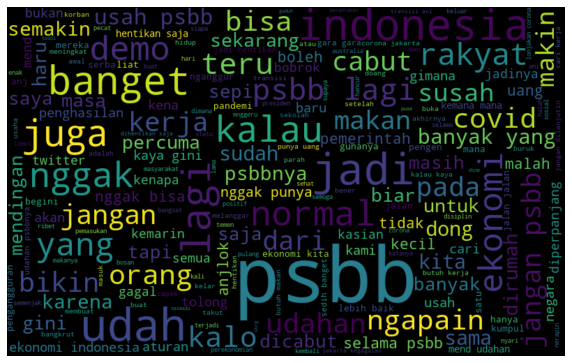

In [543]:
#worclod negatif
kata_negatif = ' '.join([str(text) for text in combine['tweet_baru'][combine['label']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(kata_negatif)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# TF-IDF Proses

In [544]:
#bag of words
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1086, stop_words=wordtext)
bow = bow_vectorizer.fit_transform(combine['tweet_baru'])

In [545]:
#tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1086, stop_words=wordtext)
tfidf = tfidf_vectorizer.fit_transform(combine['tweet_baru'])
# tfidf.todense()

terms = tfidf_vectorizer.get_feature_names()

dist = np.sum(tfidf, axis=0)

check = pd.DataFrame(dist,columns = terms)

check

,abang,abi,adem,adik,ajalah,akibat,alam,alhamdulillah,allah,aman,...,wifi,wilayah,wkwk,wkwkwk,wuhan,yaaa,yaaaa,yaudah,zaman,zona
0,1.383987,2.725268,0.72522,1.434933,1.688384,1.462577,4.309995,2.344224,2.81589,2.562736,...,1.211835,2.871886,1.27901,2.521404,0.624887,2.078276,1.429744,1.117895,1.303167,1.799236


In [546]:
# combine = combine.fillna(0)
# x_train, x_test, y_train, y_test = train_test_split(bow, combine['label'], test_size=0.2, random_state=10)

# print("\nx_train_shape : ", x_train.shape)
# print("x_test_shape  : ", x_test.shape)
# print("y_train_shape : ", y_train.shape)
# print("y_test_shape  : ", y_test.shape)

In [547]:
def preproces(text):
    txt_process = re.sub('[^a-z\s]+',' ',text,flags=re.IGNORECASE)
    txt_process = re.sub('(\s+)',' ',txt_process)
    txt_process = txt_process.lower()
    
    return txt_process

In [548]:
from collections import defaultdict

class NaiveBayesModel:
    
    def __init__(self, trainUniqueData):   
        self.classes = trainUniqueData
        

    def BagOfWord(self,example,dict_index):
        if isinstance(example,np.ndarray): example=example[0]
     
        for token_word in example.split():
          
            self.bow_dicts[dict_index][token_word]+=1
            
    def training(self,dataset,labels):
        self.examples = dataset
        self.labels = labels
        self.bow_dicts = np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
        
        if not isinstance(self.examples,np.ndarray): self.examples=np.array(self.examples)
        if not isinstance(self.labels,np.ndarray): self.labels=np.array(self.labels)
            
        for tmp_data, concat in enumerate(self.classes):
          
            concat_ex =self.examples[self.labels==concat]
            #preprocessing proses
            cleaned_examples=[preproces(tmpConcat) for tmpConcat in concat_ex]
            
            cleaned_examples=pd.DataFrame(data=cleaned_examples)
            
            #proses Bog Of Words
            np.apply_along_axis(self.BagOfWord,1,cleaned_examples,tmp_data)
            
        prob_classes=np.empty(self.classes.shape[0])
        tmp_teks = [] #menampung data teks pada list
        count_concat = np.empty(self.classes.shape[0])
        
        for tmp_data, concat in enumerate(self.classes):
           
            #perhitungan probability
            prob_classes[tmp_data]=np.sum(self.labels==concat)/float(self.labels.shape[0]) 
            
            count=list(self.bow_dicts[tmp_data].values())
            count_concat[tmp_data]=np.sum(np.array(list(self.bow_dicts[tmp_data].values())))+1 #setiap data +1
                                          
            tmp_teks+=self.bow_dicts[tmp_data].keys()
                                                    
        self.vocab=np.unique(np.array(tmp_teks))
        self.vocab_length=self.vocab.shape[0]
                                   
        denoms = np.array([count_concat[tmp_data]+self.vocab_length+1 for tmp_data, concat in enumerate(self.classes)])                                                                          
        self.concat_find = [(self.bow_dicts[tmp_data],prob_classes[tmp_data],denoms[tmp_data]) for tmp_data, concat in enumerate(self.classes)]                               
        self.concat_find = np.array(self.concat_find)                                 
                                              
                                              
    def mProbability(self,test_example):                                                                    
                                              
        prob = np.zeros(self.classes.shape[0]) #mendapatkan data probability
        
        #mendapatkan probability 
        for tmp_data, concat in enumerate(self.classes):                              
            for test_token in test_example.split():              
                countTest = self.concat_find[tmp_data][0].get(test_token,0)+1
                                            
                ProbTest = countTest/float(self.concat_find[tmp_data][2])                              

                prob[tmp_data]+=np.log(ProbTest)
                                              
        TmpProb = np.empty(self.classes.shape[0])
        for tmp_data, concat in enumerate(self.classes):
            TmpProb[tmp_data]=prob[tmp_data]+np.log(self.concat_find[tmp_data][1])                                  
      
        return TmpProb #mengembalikan nilai probability
    
   
    def testing(self,test_set):    
       
        pred =[] #menampung nilai prediksi testing
        
        for example in test_set: 
                                                                              
            preprocessing = preproces(example) 
             
            TmpProb=self.mProbability(preprocessing) #mendapatkan probability
            
            #menampung data pada array prediksi
            pred.append(self.classes[np.argmax(TmpProb)])
                
        return np.array(pred) #mengembalikan nilai prediksi berbentuk array

In [549]:
y_train = combine['label'].values
x_train = combine['tweet_baru'].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,shuffle=True,test_size=0.2,random_state=20,stratify = y_train)
trainUniqueData = np.unique(Y_train)
 

nb = NaiveBayesModel(trainUniqueData) #model naive bayes pada class naive bayes
nb.training(X_train, Y_train) #melakukan training data kepada naivebayes

klas_label = nb.testing(X_test) #proses testing data
akurasi = np.sum(klas_label==Y_test)/float(Y_test.shape[0]) #menghitung akurasi

print ("Akurasi : ", akurasi)

Akurasi :  0.8198757763975155


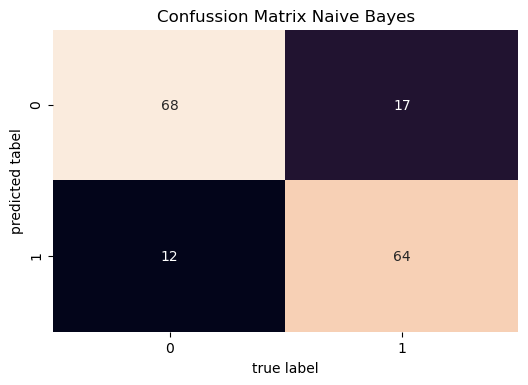

In [550]:
plt.figure(dpi=100)
mat = confusion_matrix(Y_test, klas_label)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted tabel')
plt.show()

In [553]:
Xtest = test['tweet'].values

testclass = nb.testing(Xtest)
datatest = np.column_stack([testclass])

print("Data Test Hasil Sentiment : ",datatest)

Data Test Hasil Sentiment :  [[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 

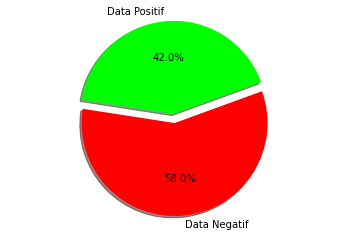

Counter({0: 116, 1: 84})

In [555]:
import collections

data_positif = np.count_nonzero(testclass == 1)
data_negatif = np.count_nonzero(testclass == 0)

# Data to plot
labels = 'Data Positif', 'Data Negatif'
sizes = [data_positif, data_negatif]
colors = ['lime', 'r']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(np.array(sizes).ravel(),explode=explode,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=20)
plt.axis('equal')
plt.show()

a = collections.Counter(testclass)

a

In [561]:
test_data_sentiment = np.array(["psbb sangat baik diterapkan di indonesia untuk meringankan penyebaran covid-19"])

test_uji_coba = nb.testing(test_data_sentiment)

if test_uji_coba == 1:
    print("Positif")
elif test_uji_coba == 0:
    print("Negatif")

Positif


# Model Naive Bayes

In [3]:
# model_naivebayes = MultinomialNB().fit(x_train, y_train)
# predicted_naivebayes = model_naivebayes.predict(x_test)

In [4]:
# plt.figure(dpi=100)
# mat = confusion_matrix(y_test, predicted_naivebayes)
# sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
# plt.title('Confussion Matrix Naive Bayes')
# plt.xlabel('true label')
# plt.ylabel('predicted tabel')
# plt.show()

# Hasil

In [5]:
# import collections

# data_positif = np.count_nonzero(predicted_naivebayes == 1)
# data_negatif = np.count_nonzero(predicted_naivebayes == 0)

# # Data to plot
# labels = 'Data Positif', 'Data Negatif'
# sizes = [data_positif, data_negatif]
# colors = ['lime', 'r']
# explode = (0.1, 0)  # explode 1st slice
# # Plot
# plt.pie(np.array(sizes).ravel(),explode=explode,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=20)
# plt.axis('equal')
# plt.show()

# a = collections.Counter(predicted_naivebayes)

In [2]:
# score_naivebayes = accuracy_score(predicted_naivebayes, y_test)
# print("Akurasi : ", score_naivebayes)


In [1]:
# test_data_sentiment = np.array(["psbb sangat baik diterapkan dengan baik di indonesia, karena penanganan covid-19 yang baik"])
# data_sentiment = tfidf_vectorizer.transform(test_data_sentiment)
# model_naivebayes.predict(data_sentiment), model_naivebayes.predict_proba(data_sentiment)